In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
google = pd.read_csv("googleplaystore.csv")

In [3]:
google.describe()

,Rating,Unnamed: 10,Unnamed: 11
count,9367.000000,0.0,0.0
mean,4.193338,NaN,NaN
std,0.537431,NaN,NaN
min,1.000000,NaN,NaN
25%,4.000000,NaN,NaN
50%,4.300000,NaN,NaN
75%,4.500000,NaN,NaN
max,19.000000,NaN,NaN


In [4]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 1016.5+ KB


In [5]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Unnamed: 10,Unnamed: 11
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,NaN,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,NaN,NaN


In [6]:
google.drop(["Unnamed: 10"],axis=1,inplace=True)
google.drop(["Unnamed: 11"],axis=1,inplace=True)

In [7]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [8]:
google['Installs'] = google['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
google['Installs'] = google['Installs'].apply(lambda x: int(str(x).replace(',', '')) if ',' in str(x) else x)

google['Price'] = google['Price'].apply(lambda x: float(str(x).replace('$', '')) if '$' in str(x) else x)

In [9]:
google.drop_duplicates(subset='App', inplace=True)


google['Size'] = google['Size'].apply(lambda x: str(x).replace('M', "") if 'M' in str(x) else x)
google['Size'] = google['Size'].apply(lambda x: float(str(x).replace('k', ""))/1024 if 'k' in str(x) else x)
google['Size'] = google['Size'].apply(lambda x: str(x).replace('Varies with device', '-1') if 'Varies with device' in str(x) else x)

google['Installs'] = google['Installs'].apply(lambda x: int(str(x).replace('+', '')) if '+' in str(x) else x)

In [10]:
google.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8,5000,Free,0,Everyone,Maps & Navigation
10832,FR Tides,WEATHER,3.8,1195,0.568359,100000,Free,0,Everyone,Weather
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.604492,1000,Free,0,Everyone,Books & Reference
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0,Everyone,Education
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-1,1000,Free,0,Mature 17+,Books & Reference
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19,10000000,Free,0,Everyone,Lifestyle


In [11]:
google1 = google.dropna()

group1 = google1.groupby('Category')
#group1.App.count().sort_values(by='App', ascending = False)
table1 = group1.App.count().sort_values(ascending = False)

table1 = pd.DataFrame(table1)

table1.head()

,App
Category,
FAMILY,1608
GAME,912
TOOLS,718
FINANCE,302
LIFESTYLE,301


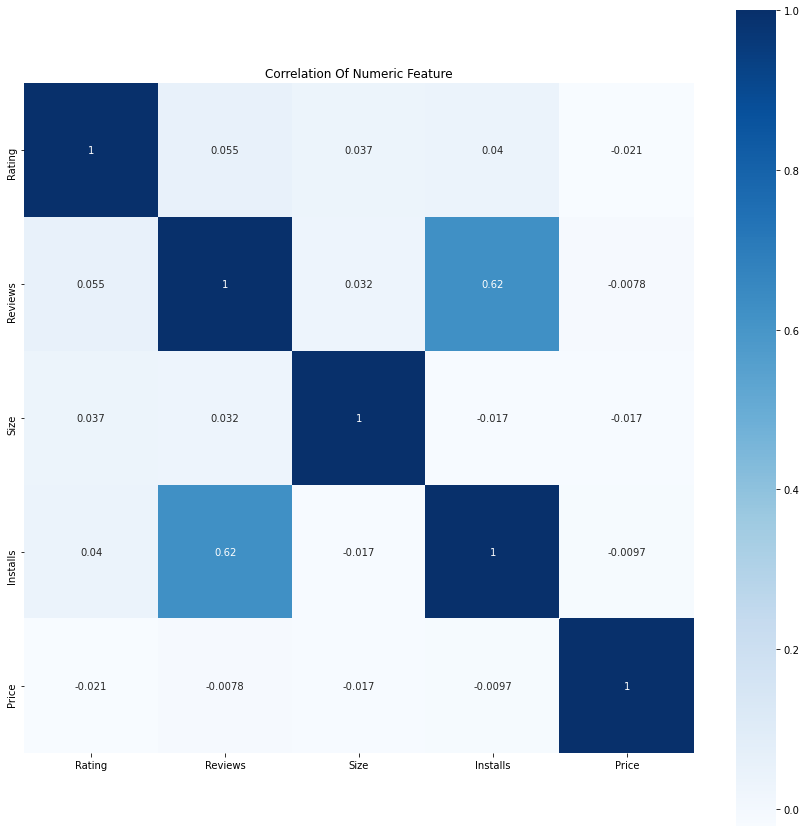

In [12]:
from sklearn import preprocessing


data = google1[['Rating','Reviews', 'Size', 'Installs', 'Price']]
data= data.astype('float64')


data = data.dropna()
#data.info()

data_scaled = preprocessing.scale(data)
data_scaled = pd.DataFrame(data_scaled)

data_corr = data_scaled.corr()
plt.subplots(figsize=(15, 15)) 


sns.heatmap(data_corr, annot=True, vmax=1, square=True, cmap="Blues", xticklabels = ['Rating','Reviews', 'Size','Installs', 'Price'], yticklabels = ['Rating','Reviews', 'Size', 'Installs', 'Price'])

plt.title('Correlation Of Numeric Feature')

plt.show()

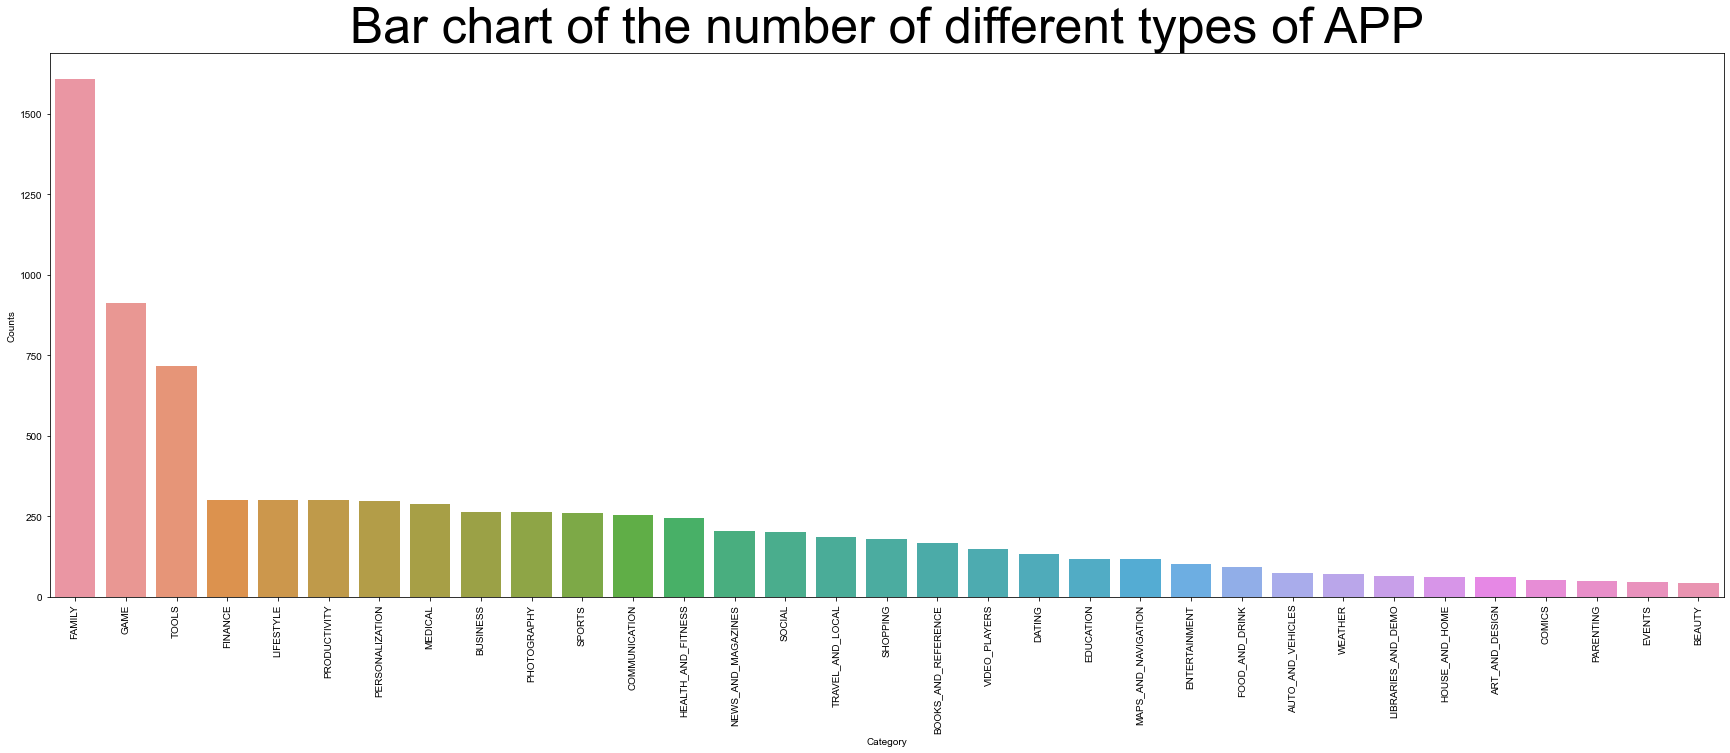

In [13]:
plt.figure(figsize = (30,10))
sns.barplot(table1.index,table1.App)
plt.xlabel("Category")
plt.ylabel("Counts")
plt.xticks(rotation = 90)
plt.title('Bar chart of the number of different types of APP',fontsize=50)

sns.set(font_scale=3)
plt.show()

In [14]:
table1.index[:5]

Index(['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'LIFESTYLE'], dtype='object', name='Category')

In [15]:
google1 = google.dropna()

In [16]:
google1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0,Everyone,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-1,1000,Free,0,Mature 17+,Books & Reference


In [17]:
google1[['Rating','Reviews', 'Size', 'Installs', 'Price']] = google1[['Rating','Reviews', 'Size', 'Installs', 'Price']].astype('float64')

google1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   float64
 4   Size            8196 non-null   float64
 5   Installs        8196 non-null   float64
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   float64
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
dtypes: float64(5), object(5)
memory usage: 704.3+ KB


In [18]:
google1[['App', 'Category', 'Rating', 'Installs', 'Type', 'Price', 'Genres']].sort_values(by = 'Installs', ascending = False)[:30]

,App,Category,Rating,Installs,Type,Price,Genres
3736,Google News,NEWS_AND_MAGAZINES,3.9,1.000000e+09,Free,0.0,News & Magazines
3234,Google,TOOLS,4.4,1.000000e+09,Free,0.0,Tools
2544,Facebook,SOCIAL,4.1,1.000000e+09,Free,0.0,Social
2545,Instagram,SOCIAL,4.5,1.000000e+09,Free,0.0,Social
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,1.000000e+09,Free,0.0,Communication
336,WhatsApp Messenger,COMMUNICATION,4.4,1.000000e+09,Free,0.0,Communication
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,1.000000e+09,Free,0.0,Communication
340,Gmail,COMMUNICATION,4.3,1.000000e+09,Free,0.0,Communication
2554,Google+,SOCIAL,4.2,1.000000e+09,Free,0.0,Social
341,Hangouts,COMMUNICATION,4.0,1.000000e+09,Free,0.0,Communication


In [19]:
group3 = google1.groupby('Category')
#group1.App.count().sort_values(by='App', ascending = False)
table3 = group3.Installs.sum().sort_values(ascending = False)

table3 = pd.DataFrame(table3)

table3[:10]

,Installs
Category,
GAME,1.387876e+10
COMMUNICATION,1.103824e+10
TOOLS,7.999724e+09
PRODUCTIVITY,5.793070e+09
SOCIAL,5.487841e+09
PHOTOGRAPHY,4.649143e+09
FAMILY,4.427480e+09
VIDEO_PLAYERS,3.926797e+09
TRAVEL_AND_LOCAL,2.894859e+09


In [20]:
google1.groupby('Category').apply(lambda t: t[t.Installs==t.Installs.max()])

App  \
Category                                                                      
ART_AND_DESIGN      3                                 Sketch - Draw & Paint   
AUTO_AND_VEHICLES   72        Android Auto - Maps, Media, Messaging & Voice   
                    8289                      AutoScout24 - used car finder   
BEAUTY              117                       Beauty Camera - Selfie Camera   
BOOKS_AND_REFERENCE 152                                   Google Play Books   
...                                                                     ...   
VIDEO_PLAYERS       3687                            Google Play Movies & TV   
WEATHER             3626  The Weather Channel: Rain Forecast & Storm Alerts   
                    3628  AccuWeather: Daily Forecast & Live Weather Rep...   
                    3649   GO Weather - Widget, Theme, Wallpaper, Efficient   
                    4725                 Weather & Clock Widget for Android   

                                     Category  Rating    Reviews  Size  \
Category                                                                 
ART_AND_DESIGN      3          ART_AND_DESIGN     4.5   215644.0  25.0   
AUTO_AND_VEHICLES   72      AUTO_AND_VEHICLES     4.2   271920.0  16.0   
                    8289    AUTO_AND_VEHICLES     4.4   186648.0  42.0   
BEAUTY              117                BEAUTY     4.0   113715.0  -1.0   
BOOKS_AND_REFERENCE 152   BOOKS_AND_REFERENCE     3.9  1433233.0  -1.0   
...                                       ...     ...        ...   ...   
VIDEO_PLAYERS       3687        VIDEO_PLAYERS     3.7   906384.0  -1.0   
WEATHER             3626              WEATHER     4.4  1558437.0  -1.0   
                    3628              WEATHER     4.4  2053404.0  -1.0   
                    3649              WEATHER     4.5  1422858.0  -1.0   
                    4725              WEATHER     4.4  2371543.0  11.0   

                              Installs  Type  Price Content Rating  \
Category                                                             
ART_AND_DESIGN      3     5.000000e+07  Free    0.0           Teen   
AUTO_AND_VEHICLES   72    1.000000e+07  Free    0.0           Teen   
                    8289  1.000000e+07  Free    0.0       Everyone   
BEAUTY              117   1.000000e+07  Free    0.0       Everyone   
BOOKS_AND_REFERENCE 152   1.000000e+09  Free    0.0           Teen   
...                                ...   ...    ...            ...   
VIDEO_PLAYERS       3687  1.000000e+09  Free    0.0           Teen   
WEATHER             3626  5.000000e+07  Free    0.0       Everyone   
                    3628  5.000000e+07  Free    0.0       Everyone   
                    3649  5.000000e+07  Free    0.0       Everyone   
                    4725  5.000000e+07  Free    0.0       Everyone   

                                           Genres  
Category                                           
ART_AND_DESIGN      3                Art & Design  
AUTO_AND_VEHICLES   72            Auto & Vehicles  
                    8289          Auto & Vehicles  
BEAUTY              117                    Beauty  
BOOKS_AND_REFERENCE 152         Books & Reference  
...                                           ...  
VIDEO_PLAYERS       3687  Video Players & Editors  
WEATHER             3626                  Weather  
                    3628                  Weather  
                    3649                  Weather  
                    4725                  Weather  

[95 rows x 10 columns]

In [21]:
group2 = google1.groupby('Rating')
#group1.App.count().sort_values(by='App', ascending = False)
table2 = group2.App.count().sort_values(ascending = False)

table2 = pd.DataFrame(table2)

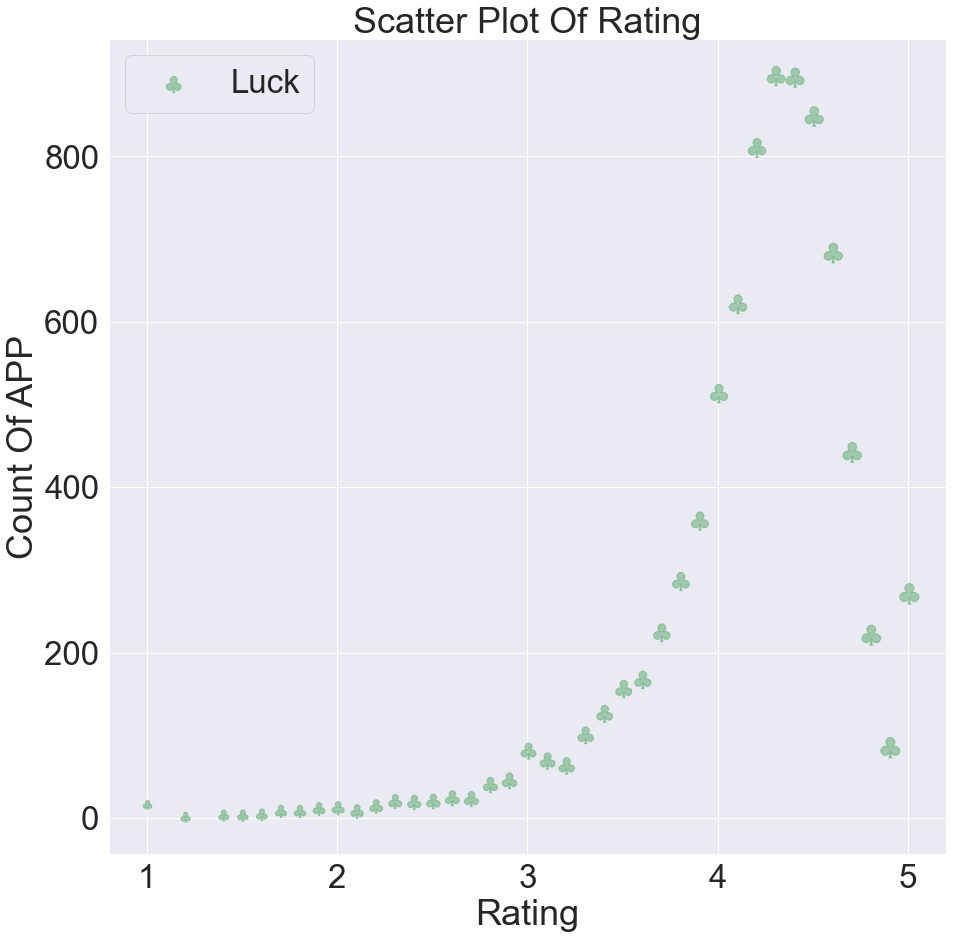

In [22]:
plt.figure(figsize = (15,15))

plt.scatter(table2.index, table2.App,s=table2.index*100, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck" )

plt.title('Scatter Plot Of Rating',)
plt.xlabel("Rating")
plt.ylabel("Count Of APP")
plt.legend(loc='upper left')
plt.show()

In [23]:
table4 = pd.pivot_table(google1,index=["Type",],aggfunc=[np.mean,np.sum])
table4 

mean                                                 \
          Installs      Price    Rating        Reviews       Size   
Type                                                                
Free  9.886686e+06   0.000000  4.166372  274689.895416  18.534420   
Paid  9.495278e+04  14.083609  4.259603   10919.483444  18.184547   

               sum                                                
          Installs   Price   Rating       Reviews           Size  
Type                                                              
Free  7.505972e+10     0.0  31631.1  2.085446e+09  140713.314355  
Paid  5.735148e+07  8506.5   2572.8  6.595368e+06   10983.466602

In [24]:
google_free = google1[google.Type == 'Free'].dropna()
google_paid = google1[google.Type == 'Paid'].dropna()

In [25]:
group5 = google_free.groupby('Category')
#group1.App.count().sort_values(by='App', ascending = False)
table5 = group5.Installs.sum().sort_values(ascending = False)
table5 = pd.DataFrame(table5)[:10]
group6 = google_paid.groupby('Category')
table6 = group6.Installs.sum().sort_values(ascending = False)
table6 = pd.DataFrame(table6)[:10]
table5

,Installs
Category,
GAME,1.385776e+10
COMMUNICATION,1.103688e+10
TOOLS,7.997998e+09
PRODUCTIVITY,5.791659e+09
SOCIAL,5.487835e+09
PHOTOGRAPHY,4.647265e+09
FAMILY,4.406833e+09
VIDEO_PLAYERS,3.926726e+09
TRAVEL_AND_LOCAL,2.894677e+09


In [26]:
result = pd.concat([table5, table6], axis=1)
result.columns = ['Installs_free', 'Installs_paid']

In [27]:
result

,Installs_free,Installs_paid
Category,,
GAME,1.385776e+10,20999262.0
COMMUNICATION,1.103688e+10,1360000.0
TOOLS,7.997998e+09,1726820.0
PRODUCTIVITY,5.791659e+09,1410810.0
SOCIAL,5.487835e+09,NaN
PHOTOGRAPHY,4.647265e+09,1878520.0
FAMILY,4.406833e+09,20646830.0
VIDEO_PLAYERS,3.926726e+09,NaN
TRAVEL_AND_LOCAL,2.894677e+09,NaN


In [28]:
result['Installs_free'][['LIFESTYLE','PERSONALIZATION','SPORTS','WEATHER']] = pd.DataFrame(group5.Installs.sum().sort_values(ascending = False))['Installs'][['LIFESTYLE','PERSONALIZATION','SPORTS','WEATHER']]
result['Installs_paid'][['NEWS_AND_MAGAZINES','SOCIAL','TRAVEL_AND_LOCAL','VIDEO_PLAYERS']] = pd.DataFrame(group6.Installs.sum().sort_values(ascending = False))['Installs'][['NEWS_AND_MAGAZINES','SOCIAL','TRAVEL_AND_LOCAL','VIDEO_PLAYERS']]

In [29]:
result

,Installs_free,Installs_paid
Category,,
GAME,1.385776e+10,20999262.0
COMMUNICATION,1.103688e+10,1360000.0
TOOLS,7.997998e+09,1726820.0
PRODUCTIVITY,5.791659e+09,1410810.0
SOCIAL,5.487835e+09,6000.0
PHOTOGRAPHY,4.647265e+09,1878520.0
FAMILY,4.406833e+09,20646830.0
VIDEO_PLAYERS,3.926726e+09,71000.0
TRAVEL_AND_LOCAL,2.894677e+09,182000.0


In [30]:
google1.sort_values(by = 'Price', ascending=False)[0:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300000,10000.0,Paid,400.00,Everyone,Lifestyle
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.700000,5000.0,Paid,399.99,Everyone,Entertainment
5354,I am Rich Plus,FAMILY,4.0,856.0,8.700000,10000.0,Paid,399.99,Everyone,Entertainment
4197,most expensive app (H),FAMILY,4.3,6.0,1.500000,100.0,Paid,399.99,Everyone,Entertainment
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.000000,10000.0,Paid,399.99,Everyone,Lifestyle
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.000000,1000.0,Paid,399.99,Everyone,Finance
5369,I am Rich,FINANCE,4.3,180.0,3.800000,5000.0,Paid,399.99,Everyone,Finance
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.700000,1000.0,Paid,399.99,Teen,Finance
5359,I am rich(premium),FINANCE,3.5,472.0,0.942383,5000.0,Paid,399.99,Everyone,Finance
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.700000,50000.0,Paid,399.99,Everyone,Finance
